In [38]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

## **Objective function**
$$
f(x, y) = x^2 + y^2
$$
<br />

### with saddle point
$$
f(x, y) = x^2 - y^2
$$

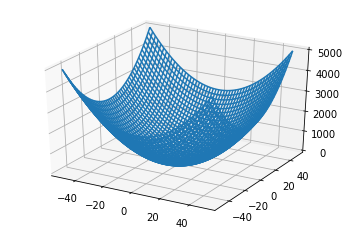

In [39]:
x = np.arange(-50, 50, 0.01)
y = np.arange(-50, 50, 0.01)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X,Y,Z)
plt.show()
fig.savefig("/content/drive/MyDrive/log/images/fig1.png")

# **SGD**

if not use momentum
$$
w_t = w_{t-1} - \gamma \nabla_w f(w_{t-1})
$$

if use momentum
$$
\begin{align*}
v_t &= \mu v_{t-1} + \nabla_wf(w_{t-1}) \\
w_t &= w_{t-1} - \gamma v_t
\end{align*}
$$

if use momentum and netrov
$$
\begin{align*}
v_t &= \mu v_{t-1} + \nabla_wf(w_{t-1}) \\
w_t &= w_{t-1} - \gamma (\nabla_wf(w_{t-1}) + \mu v_t)
\end{align*}
$$

In [40]:
x = torch.tensor(20.0, requires_grad = True)
y = torch.tensor(0.0, requires_grad = True)

op = optim.SGD([x, y], lr=0.01, momentum=0.9, nesterov=True)
print("op: \n", op)

def lr_function(mode, epoch):
  if mode == "linear":
    return -0.0002 * epoch + 0.01

iteration = 30
scheduler = optim.lr_scheduler.LambdaLR(op, lr_lambda = lambda epoch: 100 * lr_function(mode="linear", epoch=epoch))

lr = []
fx, fy = [], []
g_fx, g_fy = [], []
fx.append(x.item())
fy.append(y.item())
f_loss = []

for i in range(iteration):
  op.zero_grad()
  params = x**2 + y**2
  params.backward(retain_graph=True)

  g_fx.append(x.grad.item())
  g_fy.append(y.grad.item())

  op.step()

  lr.append(op.param_groups[0]['lr'])
  fx.append(x.item())
  fy.append(y.item())
  loss = params.item()
  f_loss.append(loss)

  scheduler.step()

op: 
 SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: True
    weight_decay: 0
)


# **Plot 2D**

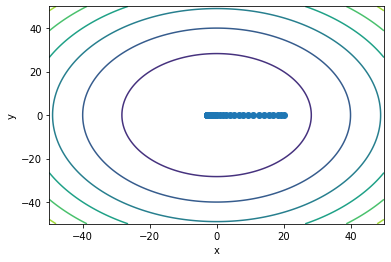

In [41]:
plt.plot(fx, fy, 'o-')
plt.contour(X, Y, Z)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("/content/drive/MyDrive/log/images/fig2.png")
plt.show()

# **Plot iteration vs gradient(objective function)**

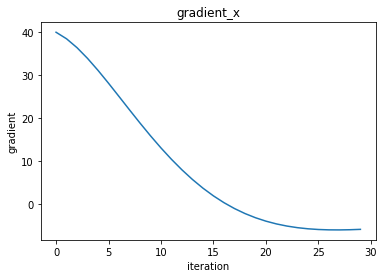

In [42]:
iteration = np.arange(0, 30, 1)
plt.plot(iteration, g_fx)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_x")
plt.savefig("/content/drive/MyDrive/log/images/fig3.png")
plt.show()

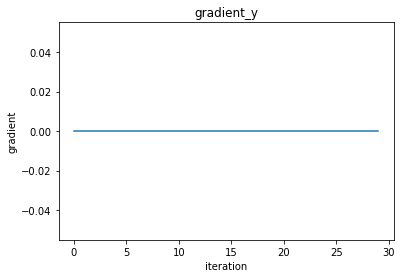

In [43]:
plt.plot(iteration, g_fy)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_y")
plt.savefig("/content/drive/MyDrive/log/images/fig4.png")
plt.show()

# **Plot iteration vs loss**

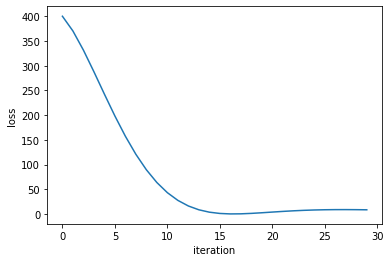

In [44]:
iteration = np.arange(0, 30, 1)
plt.plot(iteration, f_loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.savefig("/content/drive/MyDrive/log/images/fig5.png")
plt.show()

# **Plot learning rate vs gradient(SGD)**

In [45]:
grad_x = []
grad_x.append(-fx[0] / lr[0])
for i in range(1, len(iteration)):
  grad_x.append(-(fx[i - 1] - fx[i]) / lr[i])
grad_y = []
grad_y.append(-fy[0] / lr[0])
for i in range(1, len(iteration)):
  grad_y.append(-(fy[i - 1] - fy[i]) / lr[i])

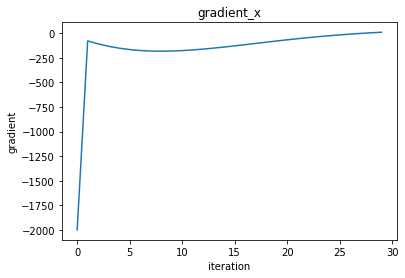

In [46]:
plt.plot(iteration, grad_x)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_x")
plt.show()

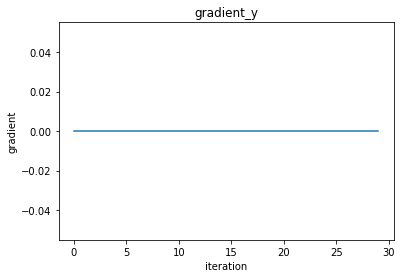

In [47]:
plt.plot(iteration, grad_y)
plt.xlabel("iteration")
plt.ylabel("gradient")
plt.title("gradient_y")
plt.show()